In [80]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
from distfit import distfit
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import lognorm
import numpy.ma as ma


In [81]:
# import list of best-performing flares
filename = '/Users/coletamburri/Desktop/Impulsiveness_Paper/imp_dev/all_and_best_Jan_2024_alt.mat'
dat = sio.loadmat(filename)

In [82]:
dat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Jan 12 10:50:21 2024',
 '__version__': '1.0',
 '__globals__': [],
 'bestflaresname': array([[array(['20100612_0030_11081_M2.0'], dtype='<U24')],
        [array(['20100807_1755_11093_M1.0'], dtype='<U24')],
        [array(['20100814_0938_11099_C4.4'], dtype='<U24')],
        [array(['20101016_1907_11112_M2.9'], dtype='<U24')],
        [array(['20101025_2206_11117_C2.3'], dtype='<U24')],
        [array(['20101111_0510_11121_C1.1'], dtype='<U24')],
        [array(['20101111_0715_11123_C4.7'], dtype='<U24')],
        [array(['20101112_0128_11123_C4.6'], dtype='<U24')],
        [array(['20110121_0412_11149_C3.3'], dtype='<U24')],
        [array(['20110121_1517_11147_C1.1'], dtype='<U24')],
        [array(['20110213_1728_11158_M6.6'], dtype='<U24')],
        [array(['20110214_0235_11158_C1.6'], dtype='<U24')],
        [array(['20110214_0651_11158_C6.6'], dtype='<U24')],
        [array(['20110214_1241_11158_C9.4'], dtype=

In [83]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

In [84]:
all_imp = dat['curly_Is_relative']
best_imp_arr = dat['curly_Is_relative_best']
recmax_arr = dat['recmax']
recmax = recmax_arr[:,0]
best_imp = best_imp_arr[:,0]
bestflaresname = dat['bestflaresname']

badidx = 387

recmax = np.delete(recmax,badidx)
best_imp = np.delete(best_imp,badidx)
bestflaresname = np.delete(bestflaresname,badidx)



In [85]:
string = bestflaresname[0][0]
string[-4]

'M'

In [86]:
goes_flux = []
for i in range(len(bestflaresname)):
    
    string = bestflaresname[i][0]
    if string[-4] == 'B':
        pwr = 1e-7
    elif string[-4] == 'C':
        pwr = 1e-6
    elif string[-4] == 'M':
        pwr = 1e-5
    elif string[-4] == 'X':
        pwr = 1e-4
    
    mult = float(bestflaresname[i][0][-3:])
    
    flux = mult*pwr
    goes_flux.append(flux)
                 
                 

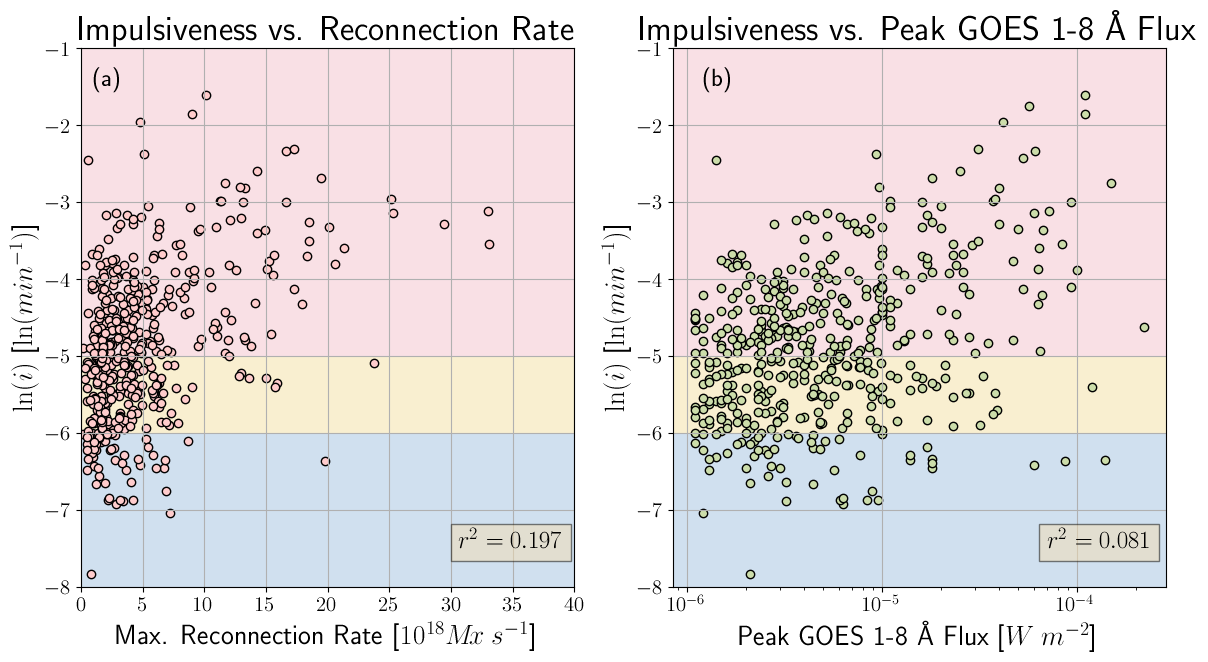

In [87]:
from matplotlib.ticker import FuncFormatter

def math_formatter(x, pos):
    return "$%s$"% int(x)

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

ax1.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax1.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax1.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)

ax1.scatter(recmax/1e18,best_imp,facecolor='#FFCCCC',edgecolor='black')
ax1.grid()
ax1.set_xlim([0,40])
x=list(range(0,45,5))
y=range(-8,0,1)
ax1.set_yticklabels(y,fontsize=15)
ax1.set_xticklabels(x,fontsize=15)

ax1.xaxis.set_major_formatter(FuncFormatter(math_formatter))
ax1.yaxis.set_major_formatter(FuncFormatter(math_formatter)) 

ax1.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax1.set_xlabel('Max. Reconnection Rate [$10^{18} M\!x\: s^{-1}$]',fontsize=20)
ax1.set_title('Impulsiveness vs. Reconnection Rate',fontsize=25)

props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax1.text(30.6,-7.5, r'$r^2 = 0.197$', fontsize=18,bbox = props)
ax1.text(1,-1.5, r'(a)', fontsize=18)

ax1.set_ylim(-8,-1)


ax2.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax2.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax2.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)

ax2.scatter(goes_flux,best_imp,facecolor='#CCDDAA',edgecolor='black')
ax2.grid()
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax2.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax2.set_xlabel('Peak GOES 1-8 \AA\ Flux [$W\:m^{-2}$]',fontsize=20)
ax2.set_title('Impulsiveness vs. Peak GOES 1-8 \AA\ Flux',fontsize=25)
props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax2.text(7e-5,-7.5, r'$r^2 = 0.081$', fontsize=18,bbox = props)
ax2.text(1.2e-6,-1.5, r'(b)', fontsize=18)

ax2.set_ylim(-8,-1)

plt.savefig('/Users/coletamburri/Desktop/imp_goes_recrate.png', dpi=300)

In [88]:
cc_imp_goes = np.corrcoef(ma.masked_invalid(goes_flux),ma.masked_invalid(best_imp))[0,1]**2
print(cc_imp_goes)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.0.08193511727773423



In [89]:
cc_imp_recrate = np.corrcoef(recmax,best_imp)[0,1]**2
cc_imp_recrate

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.19704305249671608

In [90]:
len(best_imp[best_imp>-5])

261

In [91]:
len(best_imp[recmax>15e18])

29

In [92]:
len(best_imp[(recmax>15e18) & (best_imp>-5)])

24

In [95]:
261/480

0.54375

In [96]:
len(best_imp[(recmax<15e18) & (best_imp>-5)])/len(best_imp[recmax<15e18])

0.5254988913525499

In [77]:
from statsmodels.stats.proportion import proportions_ztest

In [78]:
proportions_ztest(len(best_imp[(recmax>15e18) & (best_imp>-5)]),len(best_imp[recmax>15e18]),value=269/500)

(4.128423544970484, 3.65258847447484e-05)

In [ ]:
# reject null hypothesis, so these are definitely different proportions

#note that z-test might not be good because we haven't drawn a random sample, we have limited to above a certainvalue